# Clustering

In [122]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from mpl_toolkits import mplot3d
from sklearn.cluster import DBSCAN 
%matplotlib inline

In [123]:
data = pd.read_csv ("data.csv")

In [124]:
data["Gender"].replace ("Female", 0, inplace = True)
data["Gender"].replace ("Male", 1, inplace = True)

In [125]:
data.drop (columns = ["CustomerID"], inplace = True)

In [126]:
data.head ()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [127]:
x = data.values

In [128]:
normalize_x = StandardScaler ().fit_transform (x)

## K-Means

In [129]:
k_means = KMeans(init = "k-means++", n_clusters = 5, n_init = 12)
k_means.fit(x)
labels1 = k_means.labels_
print(labels1)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 1 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [130]:
data["Clus1"] = labels1
data.head ()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus1
0,1,19,15,39,4
1,1,21,15,81,3
2,0,20,16,6,4
3,0,23,16,77,3
4,0,31,17,40,4


In [131]:
data.groupby ("Clus1").mean ()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Clus1,,,,
0,0.461538,32.692308,86.538462,82.128205
1,0.417722,43.088608,55.291139,49.569620
2,0.527778,40.666667,87.750000,17.583333
3,0.391304,25.521739,26.304348,78.565217
4,0.391304,45.217391,26.304348,20.913043


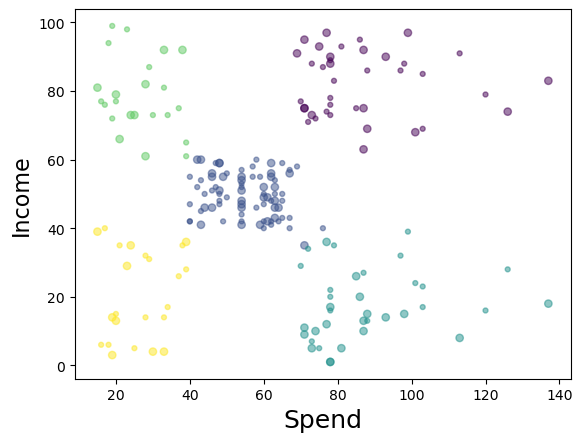

In [132]:
area = np.pi * ( x[:, 0] + 2)**2  
plt.scatter(x[:, 2], x[:, 3], s=area, c=labels1.astype(np.float64), alpha=0.5)
plt.xlabel('Spend', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

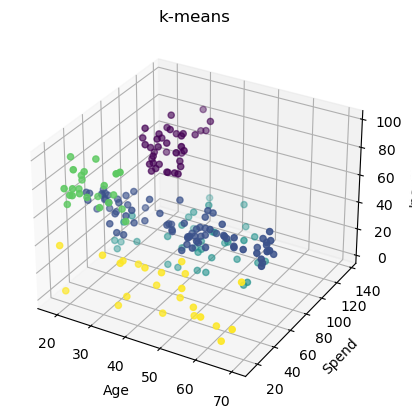

In [133]:
fig1 = plt.figure()

ax1 = plt.axes(projection ='3d')
 
x1 = x[:, 1]
y1 = x[:, 2]
z1 = x[:, 3]

ax1.set_xlabel ("Age")
ax1.set_ylabel ("Spend")
ax1.set_zlabel ("Income")

ax1.scatter(x1, y1, z1, c = labels1)

ax1.set_title('k-means')
plt.show()

## DBSCAN

In [134]:
db = db = DBSCAN(eps = 12, min_samples = 3).fit(x)
labels2 = db.labels_
print (labels2)

[-1  0 -1  0  1  0 -1 -1  1  0  1 -1  1  0 -1  0  1  0  1 -1  1  0  1  0
  1  0  1  0  1  0  1  0  1  0  1  0  1  0  1  0 -1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  2  4  2  0  2  3  2  3  2  4  2  5  2  3  2  5  2  3  2  4  2
  5  2  0  2  3  2  3  2  3  2  3  2  3  2  3  2  0  2  5  2  3  2  3  2
  3  2  3  2  3  2  3  2  3  2  3  2  3  2  3  2  3  2 -1 -1  3  2  3 -1
 -1  2 -1 -1 -1 -1 -1 -1]


In [135]:
data["Clus2"] = labels2
data.head ()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus1,Clus2
0,1,19,15,39,4,-1
1,1,21,15,81,3,0
2,0,20,16,6,4,-1
3,0,23,16,77,3,0
4,0,31,17,40,4,1


In [136]:
data.groupby ("Clus2").mean ()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus1
Clus2,,,,,
-1,0.388889,35.388889,75.055556,47.611111,2.166667
0,0.431373,39.911765,49.715686,54.186275,1.470588
1,0.375000,47.937500,26.250000,19.875000,4.000000
2,0.441176,32.882353,82.000000,83.235294,0.000000
3,0.521739,44.260870,85.173913,16.217391,2.000000
4,0.000000,25.333333,72.666667,34.333333,1.666667
5,1.000000,20.750000,76.250000,8.000000,2.000000


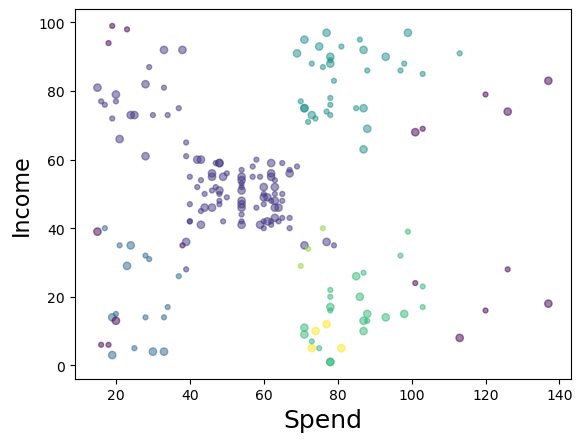

In [137]:
area = np.pi * ( x[:, 0] + 2)**2  
plt.scatter(x[:, 2], x[:, 3], s=area, c=labels2.astype(np.float64), alpha=0.5)
plt.xlabel('Spend', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

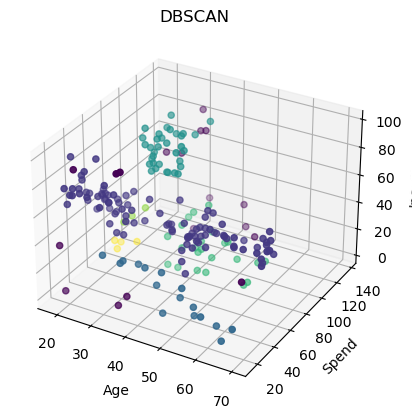

In [138]:
fig2 = plt.figure()

ax2 = plt.axes(projection ='3d')
 
x1 = x[:, 1]
y1 = x[:, 2]
z1 = x[:, 3]

ax2.set_xlabel ("Age")
ax2.set_ylabel ("Spend")
ax2.set_zlabel ("Income")

ax2.scatter(x1, y1, z1, c = labels2)

ax2.set_title('DBSCAN')
plt.show()